In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [3]:
%config InlineBackend.figure_format = 'svg'

In [700]:
data_0_0 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_0.0_c10_0.0_2022_1_27_15.csv', index_col=0)
data_base00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/toy_data_c9_0.0_c10_0.0_2022_1_31_15.csv')
big_data00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/ML_Demo/data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)
# main_file_min3_3_50 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_15_23.csv')
# main_file_min3_3_50 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_16_0.csv') # from -1 to 1
# main_file_min3_3_50 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_15_14.csv')
main_file_min3_3_50 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_3_18.csv') # feom -3 to 3
test_data_00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/toy_data_c9_0.0_c10_0.0_2022_2_3_17.csv')

In [701]:
data_base00.drop(columns=['c10', 'BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)
main_file_min3_3_50.drop(columns=['c10','BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)
test_data_00.drop(columns=['c9','c10','BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)

In [702]:
test_data_00

,q2,k,l,p
0,3.873457,0.158958,1.982635,-1.604679
1,3.299837,2.555141,1.138187,2.767353
2,4.803670,2.920779,1.866995,1.718054
3,2.497051,0.255986,2.728457,2.557163
4,4.980364,0.599808,1.159502,3.080713
...,...,...,...,...
146907,4.233746,2.666052,0.898526,-1.051128
146908,5.405676,2.866997,0.772888,0.300893
146909,4.497611,1.812525,2.323906,-0.105737
146910,1.183180,0.127549,1.175647,-3.141073


In [703]:

test_data_05 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_16_0.csv')
test_data_05.drop(columns=['c10','BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)

In [704]:
test_data_05

,q2,k,l,p,c9
0,1.145132,2.443047,1.756614,2.853556,-1.0
1,1.824994,1.297778,3.056355,-1.761316,-1.0
2,3.271832,1.286375,2.773956,-3.091715,-1.0
3,0.582304,0.356602,1.637174,-1.106401,-1.0
4,2.228964,2.542823,0.550542,-2.373252,-1.0
...,...,...,...,...,...
625728,4.527244,2.924417,1.753723,0.190465,1.0
625729,4.236904,0.086646,1.539447,-1.618018,1.0
625730,2.990325,2.518703,0.704335,0.916711,1.0
625731,3.309848,2.614404,1.836207,-2.336001,1.0


In [705]:
test_data_05=test_data_05[test_data_05.c9 == 0.5]

In [706]:
test_data_05
test_data_05.drop(columns=['c9'], inplace=True)

/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [707]:
c9_unq = main_file_min3_3_50.c9.unique()
np.random.shuffle(c9_unq)
le_dict = {c9:i for i, c9 in enumerate(c9_unq)}

In [708]:
le = LabelEncoder()
le.fit(main_file_min3_3_50.c9)
main_file_min3_3_50.c9 = le.transform(main_file_min3_3_50.c9)
data_base00.c9 = le.transform(data_base00.c9)

In [709]:
random_df = pd.DataFrame({
    'q2':np.random.uniform(0.5,6,10000), 
    'k':np.random.uniform(0,np.pi,10000), 
    'l':np.random.uniform(0,np.pi,10000), 
    'p':np.random.uniform(-np.pi,np.pi,10000), 
    'c9':[-1]*10000
})

In [710]:
random_df_val = pd.DataFrame({
    'q2':np.random.uniform(0.5,6,10000), 
    'k':np.random.uniform(0,np.pi,10000), 
    'l':np.random.uniform(0,np.pi,10000), 
    'p':np.random.uniform(-np.pi,np.pi,10000), 
    'c9':[-1]*10000
})

In [667]:
X = pd.concat([main_file_min3_3_50[main_file_min3_3_50.c9 == 0].sample(10000), main_file_min3_3_50[main_file_min3_3_50.c9 == 10].sample(10000), main_file_min3_3_50[main_file_min3_3_50.c9 == 20].sample(10000),random_df.sample(10000)])
Y = X['c9']
X = X.drop(columns=['c9'])

# mlp_clf = MLPClassifier()
# mlp_clf.fit(X.values, Y.values)

xgb_clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.3)
xgb_clf.fit(X.values, Y.values)

/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [711]:
ts = main_file_min3_3_50[main_file_min3_3_50.c9 == 20].sample(10000).drop(columns='c9')
# ts = random_df_val.sample(1000).drop(columns='c9')
# lps = sum(mlp_clf.predict_log_proba(ts))
lps = sum(np.log(xgb_clf.predict_proba(ts)))

In [712]:
{c9:likelihood for c9, likelihood in zip(xgb_clf.classes_, lps)}

{10: -7168.3545, 20: -7377.6055}

In [627]:
random = np.random.uniform(10000)


In [683]:
log_likelihood_models = {}

X = pd.concat([random_df, main_file_min3_3_50[main_file_min3_3_50.c9 == 0].sample(10000)])
Y = X['c9']
X = X.drop(columns=['c9'])

xgb_clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.3)
xgb_clf.fit(X.values, Y.values)
classes = xgb_clf.classes_
log_likelihood = {c9:[] for c9 in classes}




log_likelihood_models = log_likelihood

/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [684]:
Y.value_counts()

-1    10000
 0    10000
Name: c9, dtype: int64

In [687]:
sample =  main_file_min3_3_50[main_file_min3_3_50.c9 == 0].sample(10000).drop(columns=['c9'])
log_probs = sum(np.log(xgb_clf.predict_proba(sample)))

In [688]:
print(log_probs,classes)

[ -6529.9624 -10252.206 ] [-1  0]


In [645]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, ll_dict in log_likelihood_models.items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue

    mean_0 = np.mean(ll_dict[-1])
    mean_1 = np.mean(ll_dict[k])
    std_0 = np.std(ll_dict[-1])
    std_1 = np.std(ll_dict[k])
    # mean_0 = arr[:, 0].mean()
    # mean_1 = arr[:, 1].mean()
#     std_0 = arr[:, 0].std()
#     std_1 = arr[:, 1].std()
#     mean_0

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='NP')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

ValueError: y contains previously unseen labels: [-1]

In [715]:
log_likelihood_models = {}

for c9_t in main_file_min3_3_50.c9.unique()[::4]:
    print(c9_t)
    X = pd.concat([main_file_min3_3_50[main_file_min3_3_50.c9 == 30].sample(10000), main_file_min3_3_50[main_file_min3_3_50.c9 == c9_t].sample(10000)])
    Y = X['c9']
    # print('Y',Y)
    X = X.drop(columns=['c9'])


    # display(X.head())
    # display(Y.sample(10))

    # mlp_clf = MLPClassifier(max_iter=10)
    # mlp_clf.fit(X.values, Y.values)
    # print('here')

    xgb_clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.3)
    xgb_clf.fit(X.values, Y.values)

    classes = xgb_clf.classes_
    # print(classes)
    
    log_likelihood = {c9:[] for c9 in classes}

    for j in range(100):
        sample = test_data_00.sample(10000)
    
        log_probs = sum(np.log(xgb_clf.predict_proba(sample)))
        # print('here1')
        # print(log_probs)
        # print(log_probs)
        # print({c9:likelihood for c9, likelihood in zip(classes, log_probs)})
        for i, c9 in enumerate(classes):
            log_likelihood[c9].append(log_probs[i])
    
    # log_likelihood_models[i][ii] = np.array(log_likelihood)
    log_likelihood_models[c9_t] = log_likelihood

0
[16:42:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4
[16:42:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


8
[16:42:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


12
[16:42:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


16
[16:42:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


20
[16:42:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


24
[16:42:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


28
[16:42:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


32
[16:43:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


36
[16:43:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


40
[16:43:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


44
[16:43:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


48
[16:43:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


52
[16:43:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


56
[16:43:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


60
[16:43:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


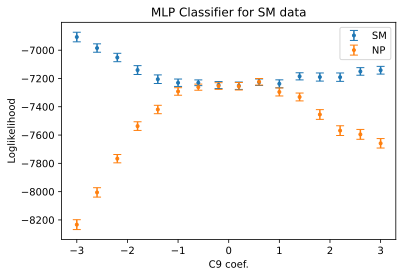

In [717]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, ll_dict in log_likelihood_models.items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue

    mean_0 = np.mean(ll_dict[30])
    mean_1 = np.mean(ll_dict[k])
    std_0 = np.std(ll_dict[30])
    std_1 = np.std(ll_dict[k])
    # mean_0 = arr[:, 0].mean()
    # mean_1 = arr[:, 1].mean()
#     std_0 = arr[:, 0].std()
#     std_1 = arr[:, 1].std()
#     mean_0

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='NP')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

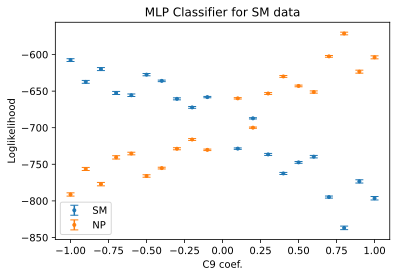

In [246]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, ll_dict in log_likelihood_models.items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue

    mean_0 = np.mean(ll_dict[10])
    mean_1 = np.mean(ll_dict[k])
    std_0 = np.std(ll_dict[10])
    std_1 = np.std(ll_dict[k])
    # mean_0 = arr[:, 0].mean()
    # mean_1 = arr[:, 1].mean()
#     std_0 = arr[:, 0].std()
#     std_1 = arr[:, 1].std()
#     mean_0

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='NP')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

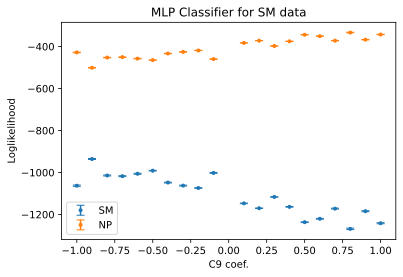

In [240]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, ll_dict in log_likelihood_models.items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue

    mean_0 = np.mean(ll_dict[10])
    mean_1 = np.mean(ll_dict[k])
    std_0 = np.std(ll_dict[10])
    std_1 = np.std(ll_dict[k])
    # mean_0 = arr[:, 0].mean()
    # mean_1 = arr[:, 1].mean()
#     std_0 = arr[:, 0].std()
#     std_1 = arr[:, 1].std()
#     mean_0

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='NP')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

In [58]:
table = table_likelihoods
one = table_likelihoods[0]
two = table_likelihoods[1]

NameError: name 'table_likelihoods' is not defined

(array([0.00920503, 0.        , 0.        , 0.        , 0.        ,
        0.00920503, 0.00920503, 0.00920503, 0.0276151 , 0.0276151 ]),
 array([-1093.61572746, -1082.75210561, -1071.88848376, -1061.02486191,
        -1050.16124006, -1039.29761821, -1028.43399636, -1017.57037451,
        -1006.70675267,  -995.84313082,  -984.97950897]),
 <BarContainer object of 10 artists>)

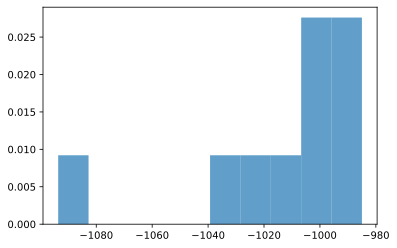

In [116]:
plt.hist(a, alpha=0.7, bins=10, density=True)

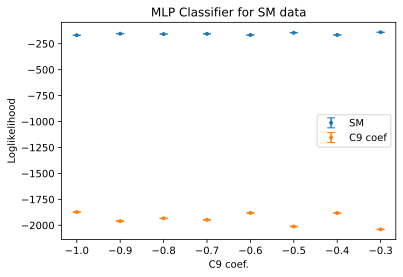

In [117]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, arr in table_likelihoods[1].items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue
    mean_0 = arr[:, 0].mean()
    mean_1 = arr[:, 1].mean()
    std_0 = arr[:, 0].std()
    std_1 = arr[:, 1].std()

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

MPL TEARN AND PREDICT

- experiment with number of hidden neurons 

In [531]:
table_likelihoods

{0: {}, 1: {}}

In [566]:
table_likelihoods = {}
for t in range(2):  
    log_likelihood_models = {}
    log_likelihood_models = {}

    for c9_t in main_file_min3_3_50.c9.unique():
        print(c9_t)
        X = pd.concat([sm_base, main_file_min3_3_50[main_file_min3_3_50.c9 == c9_t]]).sample(frac=1)
        Y = X['c9']
        # print('Y',Y)
        X = X.drop(columns=['c9'])
        xgb_clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.3)
        xgb_clf.fit(X.values, Y.values)

        classes = xgb_clf.classes_
        
        log_likelihood = {c9:[] for c9 in classes}

        for j in range(100):
            sample = test_data_00.sample(10000)
        
            log_probs = sum(np.log(xgb_clf.predict_proba(sample)))
            for i, c9 in enumerate(classes):
                log_likelihood[c9].append(log_probs[i])
        
        # log_likelihood_models[i][ii] = np.array(log_likelihood)
        log_likelihood_models[c9_t] = log_likelihood
        table_likelihoods[t] = log_likelihood_models
        # print('table:',table_likelihoods)

0
[18:38:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1
[18:38:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2
[18:39:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3
[18:39:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4
[18:39:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


5
[18:39:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


6
[18:39:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


7
[18:39:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


8
[18:40:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


9
[18:40:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


10
[18:40:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


11
[18:40:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


12
[18:40:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


13
[18:40:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


14
[18:40:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


15
[18:41:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


16
[18:41:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


17
[18:41:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


18
[18:41:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


19
[18:41:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


20
[18:41:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0
[18:41:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1
[18:42:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2
[18:42:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


3
[18:42:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


4
[18:42:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


5
[18:42:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


6
[18:42:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


7
[18:43:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


8
[18:43:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


9
[18:43:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


10
[18:43:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


11
[18:43:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


12
[18:43:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


13
[18:43:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


14
[18:44:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


15
[18:44:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


16
[18:44:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


17
[18:44:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


18
[18:44:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


19
[18:44:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


20
[18:44:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [129]:
table_likelihoods = {}
for t in range(40):  
    log_likelihood_models = {}
    table_likelihoods[t] = log_likelihood_models
    log_likelihood_models = {}

    for c9_t in main_file_min3_3_50.c9.unique():
        print(c9_t)
        X = pd.concat([sm_base, main_file_min3_3_50[main_file_min3_3_50.c9 == c9_t]]).sample(frac=1)
        Y = X['c9']
        # print('Y',Y)
        X = X.drop(columns=['c9'])
        xgb_clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.3)
        xgb_clf.fit(X.values, Y.values)

        classes = xgb_clf.classes_
        
        log_likelihood = {c9:[] for c9 in classes}

        for j in range(100):
            sample = test_data_00.sample(10000)
        
            log_probs = sum(np.log(xgb_clf.predict_proba(sample)))
            for i, c9 in enumerate(classes):
                log_likelihood[c9].append(log_probs[i])
        
        # log_likelihood_models[i][ii] = np.array(log_likelihood)
        log_likelihood_models[c9_t] = log_likelihood

    

table_likelihoods = {}
for t in range(40):  
    log_likelihood_models = {}
    table_likelihoods[t] = log_likelihood_models

    for c9_t in main_file_min3_3_50.c9.unique():
        print(c9_t)
        X = pd.concat([data_base00, main_file_min3_3_50[main_file_min3_3_50.c9 == c9_t]]).sample(frac=1)
        Y = X['c9']
        # print('Y',Y)
        X = X.drop(columns=['c9'])

        # display(X.head())
        # display(Y.sample(10))

        mlp_clf = MLPClassifier(max_iter=1000,hidden_layer_sizes=800, tol = 1e-16)
        mlp_clf.fit(X.values, Y.values)
        # print('here')
        
        log_likelihood = []
        for j in range(1000):
            sample = test_data_00.sample(1000)
        
            log_probs = mlp_clf.predict_log_proba(sample)
            # print('here1')
            # print(log_probs)
            log_likelihood.append(sum(log_probs))
        
        # log_likelihood_models[i][ii] = np.array(log_likelihood)
        log_likelihood_models[c9_t] = np.array(log_likelihood)




0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20
0
1
2
3
4
5
6
7
8
9
10


/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


11
12
13
14
15
16
17
18
19
20


KeyboardInterrupt: 

CODE THAT PLOTS GRAPHS

-16644.691
-16607.46
-16314.662
-16287.345
-16127.889
-16062.763
-15850.5
-15735.37
-15548.371
-15352.188
-15046.165
-14973.781
-14773.162
-14766.532
-14488.224
-14417.897
-14229.433
-14093.541
-13880.607
-13818.478
-16648.314
-16610.518
-16321.684
-16288.906
-16129.974
-16069.067
-15850.47
-15736.617
-15545.92
-15353.326
-15045.481
-14974.942
-14773.941
-14768.692
-14487.139
-14416.99
-14228.063
-14092.624
-13878.531
-13819.514


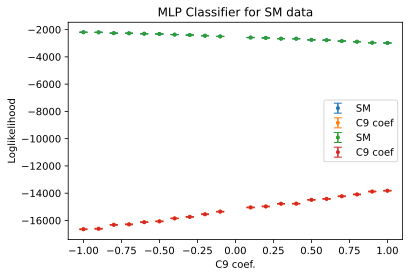

In [594]:
mean_av_0 = []
mean_av_1 = []
for i in range(2):

    k_inverse_list =[]
    mean_0_list =[]
    mean_1_list =[]
    std_0_list =[]
    std_1_list =[]
    for k, arr in table_likelihoods[i].items():
        k_inverse = le.inverse_transform([k])
        if k_inverse == 0:
            continue
        print(np.mean(arr[k]))
        mean_0 = np.mean(arr[10])
        mean_1 = np.mean(arr[k])
        std_0 = np.std(arr[10])
        std_1 = np.std(arr[k])

        k_inverse_list.append(k_inverse)
        mean_0_list.append(mean_0)
        mean_1_list.append(mean_1)
        std_0_list.append(std_0)
        std_1_list.append(std_1)
        
    mean_av_0.append(mean_0_list)
    mean_av_1.append(mean_1_list)

plt.errorbar(k_inverse_list, mean_av_0[0], marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_av_1[0], marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
plt.errorbar(k_inverse_list, mean_av_0[1], marker='.', yerr=std_0_list,c='tab:green',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_av_1[1], marker='.', yerr=std_1_list,c='tab:red',ls='none', capsize=4,label='C9 coef')
# plt.errorbar(k_inverse_list, mean_av_0[2], marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
# plt.errorbar(k_inverse_list, mean_av_1[2], marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
# plt.errorbar(k_inverse_list, mean_av_0[3], marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
# plt.errorbar(k_inverse_list, mean_av_1[3], marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
# plt.errorbar(k_inverse_list, mean_av_0[4], marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
# plt.errorbar(k_inverse_list, mean_av_1[4], marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
# plt.errorbar(k_inverse_list, mean_av_0[5], marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
# plt.errorbar(k_inverse_list, mean_av_1[5], marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()



In [94]:
len(mean_av_0[0])

20

In [134]:
len(table_likelihoods)

34

In [586]:
av_0=[]
av_1=[]
std_av0 =[]
std_av1 =[]
diff = []
for i in range(20):
    a=[]
    b=[]
    c=[]
    d=[]
    for j in range(2):
        a.append(mean_av_0[j][i])
        b.append(mean_av_1[j][i])
        c.append(mean_av_1[j][i])
        d.append(mean_av_1[j][i])
        
        
    diff.append(np.mean(b)-np.mean(a))
    av_0.append(np.mean(a))
    av_1.append(np.mean(b))
    std_av0.append(np.std(c))
    std_av1.append(np.std(d))

In [587]:
print(np.mean(std_av0)/np.mean(std_0_list))
print(np.mean(std_av1)/np.mean(std_1_list))

0.16091798
0.04887785


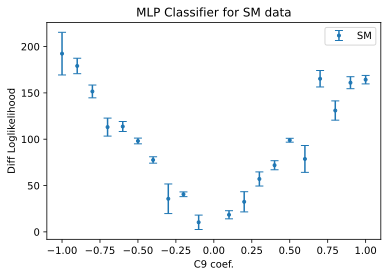

In [144]:
plt.errorbar(k_inverse_list, diff, marker='.', yerr=std_av0,c='tab:blue',ls='none', capsize=4,label='SM')
# plt.errorbar(k_inverse_list, av_1, marker='.', yerr=std_av1,c='tab:orange',ls='none', capsize=4,label='C9 coef')
plt.xlabel("C9 coef.")
plt.ylabel("Diff Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

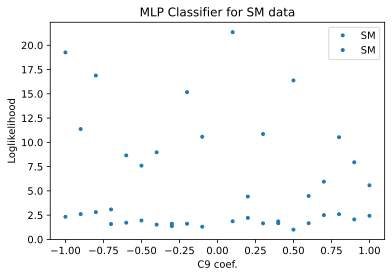

In [103]:
plt.plot(k_inverse_list, std_av0, marker='.',c='tab:blue',ls='none',label='SM')
plt.plot(k_inverse_list, std_1_list, marker='.',c='tab:blue',ls='none',label='SM')

plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

In [85]:
print(np.mean(std_av0)/np.mean(std_0_list))
print(np.mean(std_av1)/np.mean(std_1_list))

11.440406351423823
12.534573628778206
